In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/mldata/loan_data.csv')
df.head()

person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561   
1                 0.08                         2.0           504   
2                 0.44                         3.0           635   
3                 0.44                         2.0           675   
4                 0.53                         4.0           586   

  previous_loan_defaults_on_file  loan_status  
0                             No            1  
1                            Yes            0  
2                             No            1  
3                             No            1  
4                             No            1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   person_age             45000 non-null  float64
 1   person_gender          45000 non-null  object 
 2   person_education       45000 non-null  object 
 3   person_income          45000 non-null  float64
 4   person_emp_exp         45000 non-null  int64  
 5   person_home_ownership  45000 non-null  object 
 6   loan_amnt              45000 non-null  float64
 7   loan_intent            45000 non-null  object 
 8   credit_score           45000 non-null  int64  
 9   loan_status            45000 non-null  int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 3.4+ MB


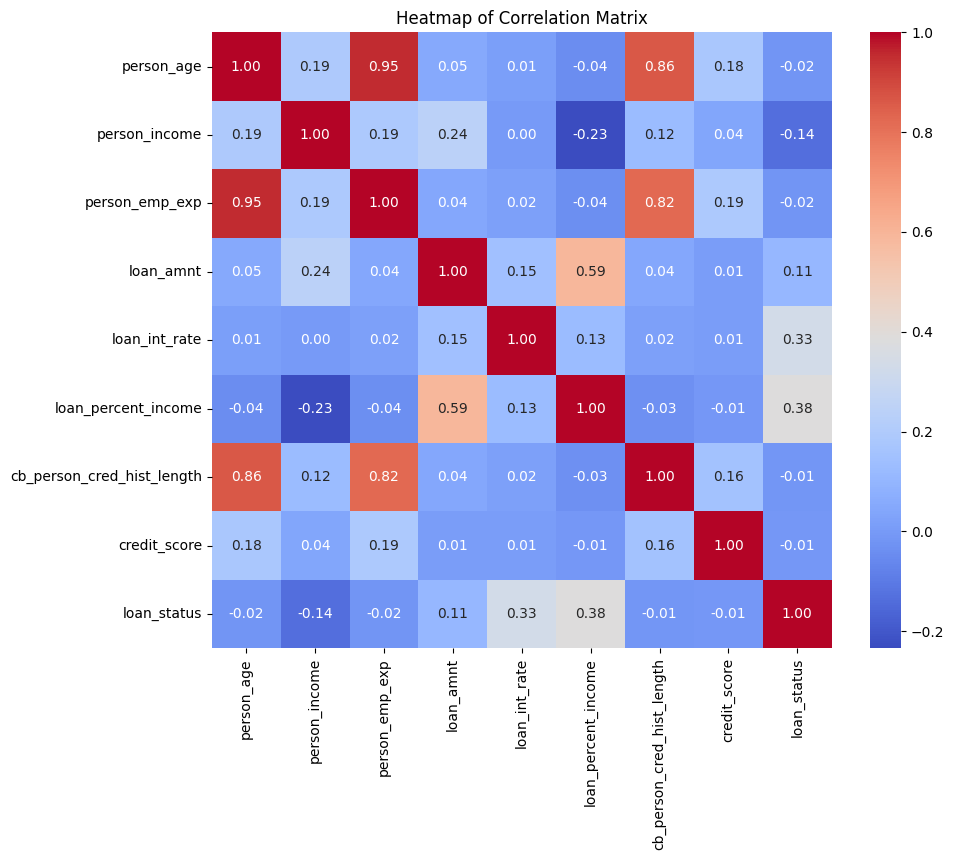

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Load or simulate the dataset
# df = pd.read_csv('your_dataset.csv')  # Load if you have a file

# Select only numerical columns
numerical_columns = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
                     'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']
numerical_data = df[numerical_columns]

# Compute the correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Heatmap of Correlation Matrix")
plt.show()


In [ ]:
df.drop(columns =['previous_loan_defaults_on_file','cb_person_cred_hist_length','loan_percent_income','loan_int_rate'], inplace = True)



In [ ]:
df.head()

person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  credit_score  loan_status  
0                  RENT    35000.0    PERSONAL           561            1  
1                   OWN     1000.0   EDUCATION           504            0  
2              MORTGAGE     5500.0     MEDICAL           635            1  
3                  RENT    35000.0     MEDICAL           675            1  
4                  RENT    35000.0     MEDICAL           586            1

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import zscore


# Step 1: Handle Missing Values
# Assuming missing values exist
df = df.dropna()

# Step 2: Encode Categorical Variables
categorical_columns = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent']
encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

# Step 3: Remove Outliers using Z-Score
numerical_columns = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'credit_score']
z_scores = np.abs(zscore(df[numerical_columns]))
df = df[(z_scores < 3).all(axis=1)]  # Keep rows with z-scores below 3

# Step 4: Normalize or Scale Numerical Data
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Step 5: Split Data into Features and Target
X = df.drop(columns=['loan_status'])
y = df['loan_status']

# Step 6: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the processed data
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train distribution:\n{y_train.value_counts(normalize=True)}")
print(f"y_test distribution:\n{y_test.value_counts(normalize=True)}")


X_train shape: (34601, 9)
X_test shape: (8651, 9)
y_train distribution:
loan_status
0    0.778619
1    0.221381
Name: proportion, dtype: float64
y_test distribution:
loan_status
0    0.778638
1    0.221362
Name: proportion, dtype: float64


<ipython-input-5-d07c2c4ab58f>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Initialize kNN Model
# Setting k=5 as a starting point
knn = KNeighborsClassifier(n_neighbors=10)

# Step 2: Train the Model
knn.fit(X_train, y_train)

# Step 3: Make Predictions
y_pred = knn.predict(X_test)

# Step 4: Evaluate the Model
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.82

Confusion Matrix:
[[6580  156]
 [1416  499]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      6736
           1       0.76      0.26      0.39      1915

    accuracy                           0.82      8651
   macro avg       0.79      0.62      0.64      8651
weighted avg       0.81      0.82      0.78      8651



In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Initialize Naive Bayes Model
naive_bayes = GaussianNB()

# Step 2: Train the Model
naive_bayes.fit(X_train, y_train)

# Step 3: Make Predictions
y_pred = naive_bayes.predict(X_test)

# Step 4: Evaluate the Model
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.81

Confusion Matrix:
[[6668   68]
 [1586  329]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.99      0.89      6736
           1       0.83      0.17      0.28      1915

    accuracy                           0.81      8651
   macro avg       0.82      0.58      0.59      8651
weighted avg       0.81      0.81      0.76      8651



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Initialize Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Step 2: Train the Model
log_reg.fit(X_train, y_train)

# Step 3: Make Predictions
y_pred = log_reg.predict(X_test)

# Step 4: Evaluate the Model
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.82

Confusion Matrix:
[[6633  103]
 [1421  494]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.98      0.90      6736
           1       0.83      0.26      0.39      1915

    accuracy                           0.82      8651
   macro avg       0.83      0.62      0.65      8651
weighted avg       0.82      0.82      0.79      8651



In [ ]:
import joblib

# Save the trained kNN model
joblib.dump(knn, 'knn_model.pkl')

# Save the trained Naive Bayes model
joblib.dump(naive_bayes, 'naive_bayes_model.pkl')

# Save the trained Logistic Regression model
joblib.dump(log_reg, 'log_reg_model.pkl')

print("Models have been saved successfully!")


Models have been saved successfully!


In [ ]:
import joblib
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the saved models
knn = joblib.load('knn_model.pkl')
naive_bayes = joblib.load('naive_bayes_model.pkl')
log_reg = joblib.load('log_reg_model.pkl')


In [ ]:
# Install Anvil Uplink
!pip install anvil-uplink

# Import the library and connect to Anvil
import anvil.server


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 2.5 MB/s eta 0:00:00


In [ ]:

# Replace with your Anvil Uplink key
anvil.server.connect("server_4NINEPK6AH3ZEAJV553SJSDV-F5PBTRZXU7VHHVL2")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default Environment" as SERVER


In [ ]:


# Load your trained models
knn = joblib.load('knn_model.pkl')
naive_bayes = joblib.load('naive_bayes_model.pkl')
log_reg = joblib.load('log_reg_model.pkl')

# Preprocessing function
def preprocess_user_input(user_input):
    # Encoding categorical features
    categorical_columns = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent']
    label_encoders = {col: LabelEncoder() for col in categorical_columns}

    for col in categorical_columns:
        # Simulate fitting encoder (use consistent mapping for production)
        user_input[col] = label_encoders[col].fit_transform([user_input[col]])[0]

    # Scale numerical features
    numerical_columns = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'credit_score']
    scaler = StandardScaler()

    numerical_values = [[user_input[col] for col in numerical_columns]]  # 2D array for scaling
    scaled_values = scaler.fit_transform(numerical_values)

    # Update user_input with scaled values
    for i, col in enumerate(numerical_columns):
        user_input[col] = scaled_values[0][i]

    return user_input

@anvil.server.callable
def predict_loan_eligibility(user_input):
    # Preprocess the user input
    processed_input = preprocess_user_input(user_input)

    # Convert processed input to DataFrame
    X_input = pd.DataFrame([[
        processed_input['person_age'], processed_input['person_gender'], processed_input['person_education'],
        processed_input['person_income'], processed_input['person_emp_exp'], processed_input['person_home_ownership'],
        processed_input['loan_amnt'], processed_input['loan_intent'], processed_input['credit_score']
    ]], columns=['person_age', 'person_gender', 'person_education', 'person_income',
                 'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent', 'credit_score'])

    # Evaluate models and find the best
    knn_accuracy = knn.score(X_test, y_test)
    nb_accuracy = naive_bayes.score(X_test, y_test)
    log_reg_accuracy = log_reg.score(X_test, y_test)

    best_model = None
    max_accuracy = max(knn_accuracy, nb_accuracy, log_reg_accuracy)

    if max_accuracy == knn_accuracy:
        best_model = knn
        model_name = 'kNN'
    elif max_accuracy == nb_accuracy:
        best_model = naive_bayes
        model_name = 'Naive Bayes'
    else:
        best_model = log_reg
        model_name = 'Logistic Regression'

    # Make the final prediction
    final_pred = best_model.predict(X_input)

    # Return the result
    if final_pred[0] == 1:
        return f"The model with the highest accuracy ({model_name}) predicts: Approved for Loan!"
    else:
        return f"The model with the highest accuracy ({model_name}) predicts: Not Approved for Loan."

In [ ]:
anvil.server.wait_forever()